### Fetal Health Classification

***

Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

Find the dataset <a href = 'https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification'>here </a>

### Import necessary libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'fetal_health.csv'

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### View all the unique values in fetal_health feature

In [5]:
df['fetal_health'].unique()

array([2., 1., 3.])

### Check info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### View basic statistical information

In [7]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Check for null values

In [8]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Check for duplicates, Remove if any

In [9]:
df.duplicated().sum()

13

In [10]:
df.drop_duplicates(inplace = True, keep = 'first')

### Plot a countplot of fetal_health

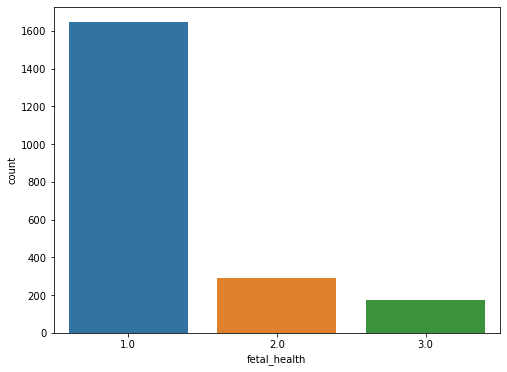

In [11]:
plt.figure(figsize  = (8,6))
sns.countplot(x = df['fetal_health'])
plt.show()

### Plot correlation matrix of the dataset in a heatmap

<AxesSubplot:>

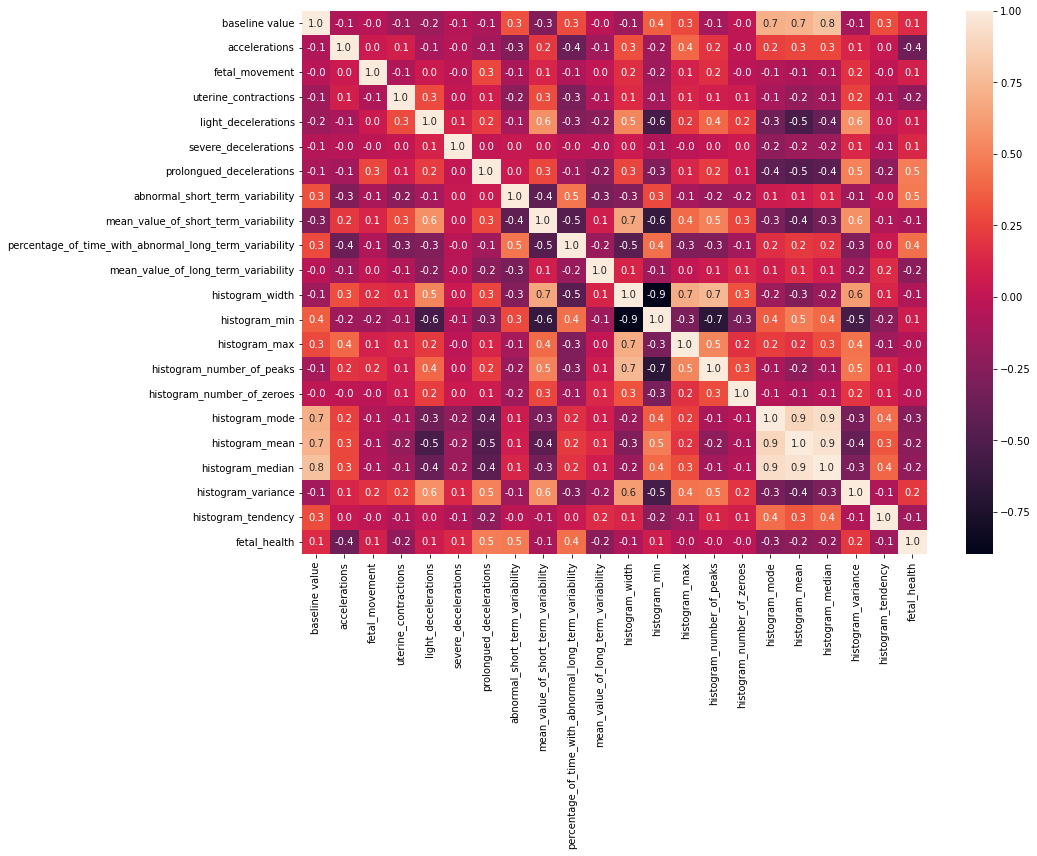

In [12]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

### Split the dataset into Input & Target Variables

In [13]:
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

### Standardise the dataset

In [15]:
scaler = StandardScaler()

In [16]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [17]:
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352782,-0.823776,-0.203392,-1.492245,-0.641203,-0.057653,-0.26964,1.514300,-0.944425,1.811237,-1.023982,-0.167577,-1.067985,-2.123628,-0.703885,-0.460150,-1.064409,0.153804,-1.180575,1.863218,1.115505
1,-0.132665,0.726444,-0.203392,0.548605,0.370643,-0.057653,-0.26964,-1.746497,0.865205,-0.534294,0.396579,1.524797,-0.864976,1.889542,0.651603,0.953071,0.216224,0.089729,0.131985,-0.237919,-0.521344
2,-0.030989,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,0.865205,-0.534294,0.929289,1.524797,-0.864976,1.889542,0.312731,0.953071,0.216224,0.025654,-0.006179,-0.203474,-0.521344
3,0.070687,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,2.633962,1.191450,-1.372500,0.328865,2.345964,-0.460150,-0.027706,-0.038421,-0.075261,-0.203474,1.115505
4,-0.132665,0.984814,-0.203392,1.228888,-0.641203,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,2.083495,1.191450,-1.372500,0.328865,1.668219,-0.460150,-0.027706,0.089729,-0.006179,-0.272364,1.115505


### Split the dataset into Training and Testing Set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### Create Support Vector Machine model and Train it

In [21]:
model = SVC()

In [22]:
model.fit(X_train, y_train)

SVC()

### Check the accuracy of the training set

In [23]:
model.score(X_train, y_train)

0.929585798816568

### Make predictions with X_test

In [24]:
y_pred = model.predict(X_test)

### Check accuracy of our prediction

In [26]:
accuracy_score(y_test, y_pred)

0.9101654846335697

### Plot confusion matrix on a heatmap

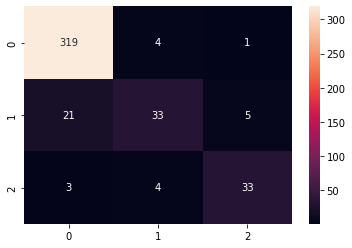

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

### Print Classification report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       324
         2.0       0.80      0.56      0.66        59
         3.0       0.85      0.82      0.84        40

    accuracy                           0.91       423
   macro avg       0.86      0.79      0.82       423
weighted avg       0.90      0.91      0.90       423



***

## Using Random Forest Classifier

### Create random forest model object and use GridSearchCV to find the best hyperparamters

In [34]:
rf = RandomForestClassifier()

In [35]:
params = {'n_estimators': list(range(1,100))}

In [38]:
model = GridSearchCV(rf, params, cv = 3, scoring = 'accuracy')

In [40]:
%time model.fit(X_train, y_train)

Wall time: 34.5 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### Check the accuracy of our training set

In [41]:
model.score(X_train, y_train)

0.9994082840236687

### Make Prediction with X_test

In [43]:
y_pred = model.predict(X_test)

### Check accuracy of our prediction

In [45]:
accuracy_score(y_test, y_pred)

0.9385342789598109

### Plot confusion matrix on heatmap

<AxesSubplot:>

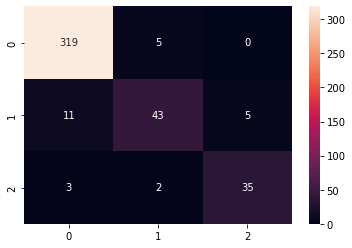

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

### Print Classification report

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       324
         2.0       0.86      0.73      0.79        59
         3.0       0.88      0.88      0.88        40

    accuracy                           0.94       423
   macro avg       0.90      0.86      0.88       423
weighted avg       0.94      0.94      0.94       423



***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></a></center>